# **2º Trabalho de Aprendizado de Máquina - UFSCar 2020/1**

---

**Trabalho referente a aplicação de métodos de aprendizado de máquina não supervisionado em Bases de Dados.**

**Professor**
> Diego Furtado Silva

**Participantes:**

>André Hallwas Ribeiro Alves -> andrehallwas12@hotmail.com
>
>Bruna Fernandes Prates -> brunafernandes@estudante.ufscar.br
>
>Esther Calderan Hoffmann -> esther@estudante.ufscar.br
>
>Leonardo Ryu Takaki -> lrtakaki@estudante.ufscar.br
>
>Vitor Moreira Moreale -> vitormoreale@estudante.ufscar.br


- Base de dados
-- [Vinho](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)
- Pré-processamento e preparação dos dados
- Métricas de avaliação
- Algoritmos
-- K-means
-- DBSCan
-- Agglomerative Clustering


In [ ]:
# Importações
import numpy as np
import pandas as pd
import scipy as sp
import scipy.spatial as sps
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt 
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.decomposition import SparsePCA, TruncatedSVD, FactorAnalysis, DictionaryLearning, FastICA, KernelPCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth, AffinityPropagation, AgglomerativeClustering, FeatureAgglomeration
from sklearn import cluster, covariance, manifold
from sklearn.model_selection import GridSearchCV

In [ ]:
# Somente no Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Leitura dos Dados

###Base de Dados - Contexto

Portugal é considerado um dos 10 maiores exportadores de vinho e, para apoiar seu crescimento, a indústria busca investir em novas tecnologias a serem aplicadas nos processos de vinificação (conjunto de operações que transformam a uva em vinho) e venda.

A certificação de vinhos evita possíveis fraudes e garante a qualidade do mercado; sendo, geralmente, avaliada por meio de testes sensoriais, que dependem da atuação de especialistas humanos; e testes físico-químicos, realizados em laboratório utilizando variáveis que serão tratadas como os atributos deste trabalho.

Portanto, o dataset escolhido possui amostras de vinho verde branco e tinto de Portugal e tem como objetivo entender as semelhanças e diferenças entre vinhos que são considerados de mesma qualidade.


###Base de Dados - Análise Exploratória
Os atributos dados como entrada equivalem às variáveis tratadas em testes físico-químicos realizados em laboratório, ou seja, correspondem a típicas características dos vinhos para avaliar sua qualidade. São estes:

1. **fixed acidity (acidez fixa)**

2. **volatile acidity (acidez volátil)**
Em níveis muito altos, pode ocasionar um sabor desagradável de vinagre.

3. **citric acid (ácido cítrico)**
Pode adicionar frescor e sabor, se em pequenas quantidades.

4. **residual sugar (açúcar residual)**
Quantidade de açúcar que resta após a parada da fermentação.

5. **chlorides (cloretos)**
Quantidade de sal presente no vinho.

6. **free sulfur dioxide (dióxido de enxofre livre)**
Impede o crescimento microbiano e a oxidação do vinho.

7. **total sulfur dioxide (dióxido de enxofre total)**
Em baixas concentrações, é indetectável; em altas, torna-se evidente pelo olfato e no sabor do vinho.

8. **density (densidade)**
Valor próximo a densidade da água dependendo da porcentagem de álcool e açúcar.

9. **pH**
Descreve o quão ácido ou básico um vinho é em uma escala de 0 (muito ácido) a 14 (muito básico); sendo que a maioria dos vinhos está entre 3-4 na escala de pH.

10. **sulphates (sulfatos)**
Um aditivo que pode contribuir para os níveis de dióxido de enxofre livre.

11. **alcohol (álcool)**
Teor alcoólico do vinho.


In [ ]:
# Read Data
# df = pd.read_csv("winequality-red.csv") # Se o dataset estiver na Pasta
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-red.csv") # Somente se o dataset estiver no Colab
classes = df.iloc[:,-1].values
df_num_classes = len(set(df.iloc[:,-1].values))
df = df.drop(columns=['quality'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


## Pré-Processamento e Redução de dimensionalidade

*   Normalização
*   PCA



In [ ]:
# Fit and Preprocessing
# df = KernelPCA(n_components=2, random_state=1).fit_transform(df)
# df = FastICA(n_components=2, random_state=1).fit_transform(df)
# df = DictionaryLearning(n_components=2, random_state=1,n_jobs=-1).fit_transform(df)
# df = FactorAnalysis(n_components=2, random_state=1).fit_transform(df)
df = SparsePCA(n_components=2, random_state=1).fit_transform(df)
df = sp.sparse.coo_matrix(df)
df_no = shuffle(df, random_state = 1) #Sem normalização
df = preprocessing.normalize(df)
df = shuffle(df, random_state = 1)
# df = sp.sparse.coo_matrix(TruncatedSVD(n_components=2, random_state=1).fit_transform(df))

### Preparação dos Dados

In [ ]:
# Parse
X = df.tocsr()
X_no = df_no.tocsr()
n_clusters = df_num_classes

## Funções para Análises, Graficos e Visualização dos Dados

In [ ]:
# Show
X_plot = X.toarray()
X_plot_no = X_no.toarray()

def plot_centroid(X_plot, model):
  plt.scatter(X_plot[:,0], X_plot[:,1], s=5)
  plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='yellow')
  plt.show()

def plot_voronoi(X_plot, model):
  sps.voronoi_plot_2d(sps.Voronoi(model.cluster_centers_))
  plt.scatter(X_plot[:, 0], X_plot[:, 1], c=pred, s=1, cmap='magma')
  plt.show()

def plot_dendogram(X_plot):
  graph = dendrogram(linkage(X_plot, method = 'ward'))
  plt.title('Dendrogram')
  plt.xlabel('Data')
  plt.ylabel('Distância Euclidiana')

def plot_cluster_data(X_plot, pred):
  plt.scatter(X_plot[:,0],X_plot[:,1], c=pred, cmap='rainbow')
  plt.show()

### Funções para a Avaliação e Métricas

*   Silhueta

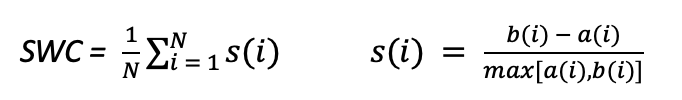



In [ ]:
# Evaluate
def evaluate_all(X, model, y = None):
  print("\nMétrics Results:")
  print("Silhouette Score: ", metrics.silhouette_score(X, model.labels_))
  # print("V-measure: ", metrics.v_measure_score(y, model.labels_))
  # print("Homogenidade: ", metrics.homogeneity_score(y, model.labels_))
  # print("completitude: ", metrics.completeness_score(y, model.labels_))


## Aplicação do K-Means

O K-means é um algoritmo de **agrupamento particional**. Ele atribui a **cada um dos n exemplos de dados um dos k grupos ou clusters**. O número de clusters é previamente definido, e **cada um dos clusters é definido por um ponto central**, o **centroide**. Em seu funcionamento, utiliza **uma função heuristica** para determinar os valores iniciais dos centroides, e então **repete dois passos fundamentais** até atingir o limite de interações pré-definido, ou convergir. primeiramente **atribui cada um dos exemplos a um dos centroides**, e então modifica os limites do cluster do **atualizando o local dos centroides com base na média do grupo**.

Detalhes:
*   Sensivel a Posição inicial dos Centroids
*   Sensivel a Outliers
*   Sensivel a dados Numéricos


### Estimando hiperparametros

In [ ]:
# K-Means

param_grid =  [{'init': ["kmeans++", "random"],
                'n_clusters': [n_clusters],
                'max_iter': [5000],
                'n_jobs': [-1],
                'random_state': [1],
                'algorithm': ["auto", "full", "elkan"]}]

model = KMeans()
model = GridSearchCV(model, param_grid=param_grid, n_jobs=-1).fit(X) # Com normalização
print("\nKMeans com Normalização:\n", model.best_estimator_)

model = KMeans()
model = GridSearchCV(model, param_grid=param_grid, n_jobs=-1).fit(X_no) # Sem normalização
print("\nKMeans sem Normalização:\n", model.best_estimator_)


KMeans com Normalização:
 KMeans(algorithm='auto', copy_x=True, init='random', max_iter=5000,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

KMeans sem Normalização:
 KMeans(algorithm='auto', copy_x=True, init='random', max_iter=5000,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)


### Aplicando o Modelo sem Normalização

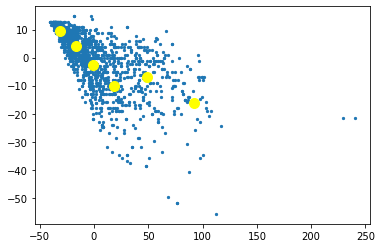

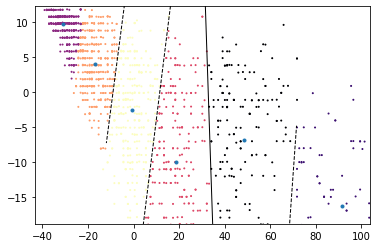

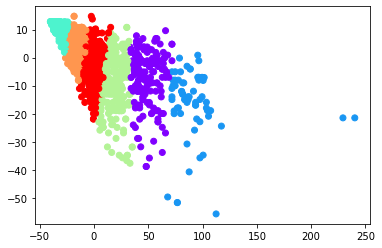


Métrics Results:
Silhouette Score:  0.42051913892394666


In [ ]:
model = KMeans(algorithm='auto', copy_x=True, init='random', max_iter=5000,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0).fit(X_no)

pred = model.predict(X_no)

plot_centroid(X_plot_no, model)
plot_voronoi(X_plot_no, model)
plot_cluster_data(X_plot_no, pred)

evaluate_all(X_plot_no, model, classes)

### Aplicando o Modelo com Normalização

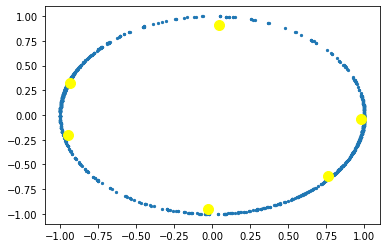

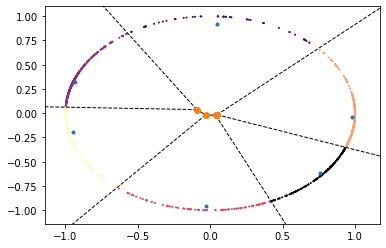

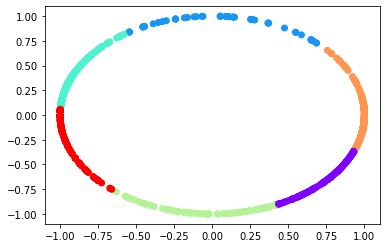


Métrics Results:
Silhouette Score:  0.611262325974158


In [ ]:
model = KMeans(algorithm='auto', copy_x=True, init='random', max_iter=5000,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0).fit(X)

pred = model.predict(X)

plot_centroid(X_plot, model)
plot_voronoi(X_plot, model)
plot_cluster_data(X_plot, pred)

evaluate_all(X_plot, model, classes)

## Aplicação do DBScan

Density Based Spatial Clustering of Application with Noise (DBSCAN) é um algoritmo de clusterização baseado em densidade que possui uma boa capacidade de detectar cluster de diversos formatos e tamanhos bem como identificar ruídos nos dados. A maneira como ele faz a separação de clusters é por meio de regiões densas, que nada mais são do que vizinhanças de raio r em torno dos pontos que apresentam um número de vizinhos maior ou igual do que um limiar estabelecido pelo programador. Utilizando o raio da vizinhança e o limiar do número mínimo de vizinhos podemos chegar a tais definições:

 - **Ponto de núcleo**: é um ponto que apresenta um número de vizinhos, dentro de sua vizinhança de raio r, maior ou igual ao limiar
 - **Ponto de borda**: é um ponto que possui um número de vizinhos menor do que o limiar, porém sendo um desses vizinhos um ponto de núcleo
 - **Ruído**: é um ponto que também possui um número de vizinhos menor do que o limiar e dentre tais vizinhos não há nenhum ponto de núcleo.

Considerando tais tipos de pontos, podemos definir o conceito de alcançabilidade como:

Um ponto p1 é dito **alcançável diretamente** por um ponto p2 se p1 está na vizinhança de raio r do ponto p2 e p2 é um ponto de núcleo. Por outro lado, um ponto p1 é dito **alcançável indiretamente** por p2 se há uma corrente de pontos alcançáveis diretamente que ligue os pontos p1 e p2.

Com isso, a maneira com que o algoritmo escolhe quais dados formarão clusters é por meio destas noções de alcançabilidade. Para todos os pontos do dataset é verificado quais outros pontos são alcançáveis direta ou indiretamente, atribuindo-os ao mesmo cluster do ponto de origem. Ao final da execução os pontos que não foram atribuídos a nenhum cluster serão classificados como outliers ou, como definido anteriormente, ruídos.

É importante destacar a importância da escolha correta dos valores do raio da vizinhança e do limiar de vizinhos mínimos. Definir o raio grande poderá ocasionar em um número muito grande de pontos de núcleo, fazendo com que dados que não deveriam ser agrupados juntos sejam colocados no mesmo cluster. O mesmo para o limiar pois, caso este valor seja muito pequeno também acarretará em um número grande de pontos de núcleo.


Aplicando o modelo

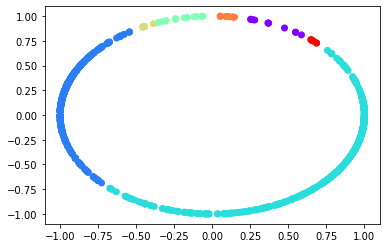


Métrics Results:
Silhouette Score:  0.5498355768476059


In [ ]:
model = DBSCAN(eps=0.075, min_samples=5, metric='euclidean',
                metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=-1)

pred = model.fit_predict(X)

plot_cluster_data(X_plot, pred)

evaluate_all(X_plot, model, classes)


## Aplicação de clustering Hierarquico com Agglomerative Clustering

É um método de agrupamento que busca construir uma **hierarquia entre clusters**.

Para isto, precisa-se definir dois recursos:

- Uma métrica de distância que será utilizada para determinar o quão distante dois pontos estão;
- Um critério de ligação, que dirá como conectar os pontos (conectar aqueles que possuem distância mínima, ou máxima, ou média, etc).

Resumidamente, **o algoritmo une recursivamente um par de clusters seguindo o critério de ligação, utilizando uma métrica de distância**.

Em nosso código estamos unindo os clusters com o critério de ward linkage. Este critério une, a cada nível, os clusters que minimizam o crescimento da variância intra-grupos.

O agrupamento hierárquico pode ser visualizado através de um dendrograma: quanto mais alta a linha ligando dois clusters, mais tarde foi feito seu agrupamento. A altura da linha ligando dois clusters é proporcional à sua distância.

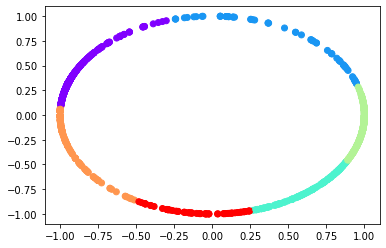


Métrics Results:
Silhouette Score:  0.5987569875253802


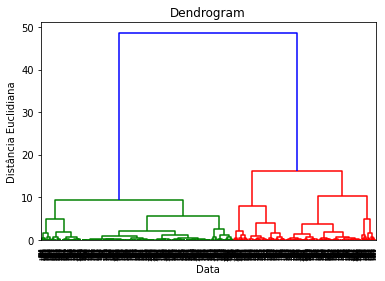

In [ ]:
# AglomerativeClustering
model = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
pred = model.fit_predict(X.toarray())

plot_cluster_data(X_plot, pred)
plot_dendogram(X_plot)

evaluate_all(X_plot, model, classes)